In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import skew, kurtosis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


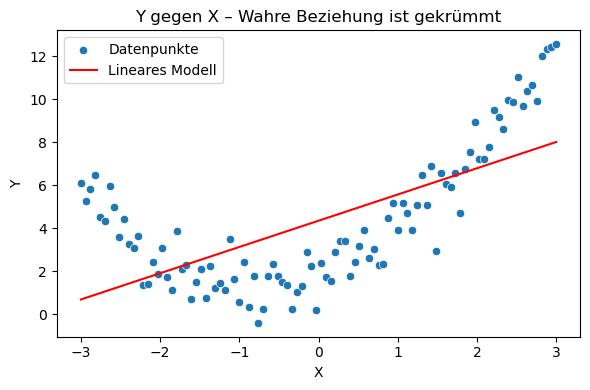

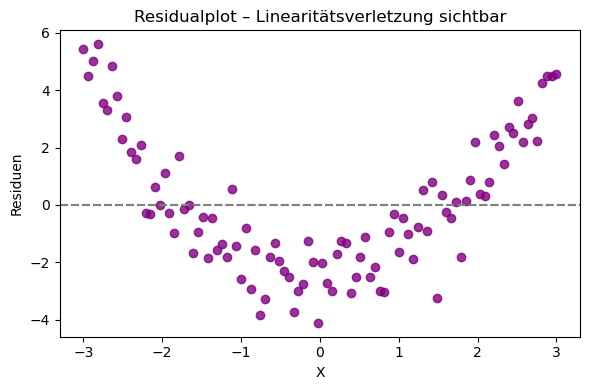

In [22]:
# 1. Daten erzeugen – linear + quadratisch
np.random.seed(42)
X = np.linspace(-3, 3, 100)
Y = 2 + 1.2 * X + 0.8 * X**2 + np.random.normal(scale=1, size=len(X))

df = pd.DataFrame({'X': X, 'Y': Y})

# 2. Falsches Modell fitten (nur linearer Term)
model = smf.ols('Y ~ X', data=df).fit()
df['Y_pred'] = model.fittedvalues
df['residuals'] = model.resid

# 3. Plot: Y gegen X (sichtbarer Trend + Krümmung)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='X', y='Y', data=df, label='Datenpunkte')
sns.lineplot(x='X', y='Y_pred', data=df, color='red', label='Lineares Modell')
plt.title('Y gegen X – Wahre Beziehung ist gekrümmt')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Plot: Residualplot (U-förmige Struktur sichtbar)
plt.figure(figsize=(6, 4))
sns.residplot(x='X', y='Y', data=df, lowess=False, color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residualplot – Linearitätsverletzung sichtbar')
plt.xlabel('X')
plt.ylabel('Residuen')
plt.tight_layout()
plt.show()


C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


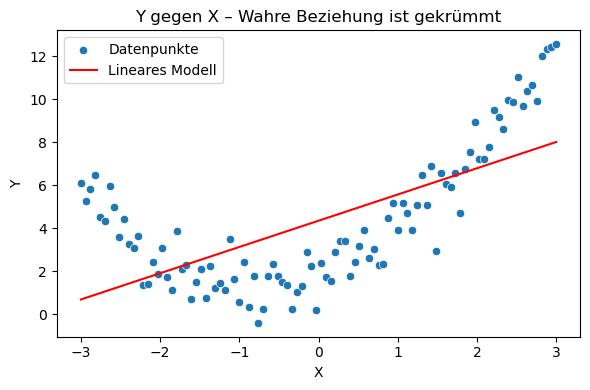

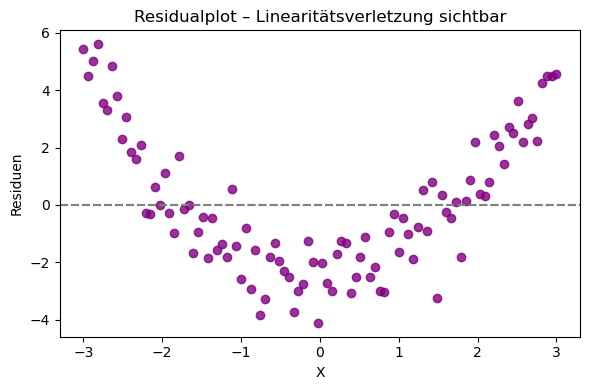

In [23]:
# 1. Daten erzeugen – linear + quadratisch
np.random.seed(42)
X = np.linspace(-3, 3, 100)
Y = 2 + 1.2 * X + 0.8 * X**2 + np.random.normal(scale=1, size=len(X))

df = pd.DataFrame({'X': X, 'Y': Y})

# 2. Falsches Modell fitten (nur linearer Term)
model = smf.ols('Y ~ X', data=df).fit()
df['Y_pred'] = model.fittedvalues
df['residuals'] = model.resid

# 3. Plot: Y gegen X mit linearer Regressionslinie
plt.figure(figsize=(6, 4))
sns.scatterplot(x='X', y='Y', data=df, label='Datenpunkte')
sns.lineplot(x='X', y='Y_pred', data=df, color='red', label='Lineares Modell')
plt.title('Y gegen X – Wahre Beziehung ist gekrümmt')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout()
plt.savefig('scatter_with_linear_fit.png', dpi=300)
#plt.close()

# 4. Plot: Residualplot
plt.figure(figsize=(6, 4))
sns.residplot(x='X', y='Y', data=df, lowess=False, color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residualplot – Linearitätsverletzung sichtbar')
plt.xlabel('X')
plt.ylabel('Residuen')
plt.tight_layout()
plt.savefig('residual_plot_curved.png', dpi=300)
#plt.close()


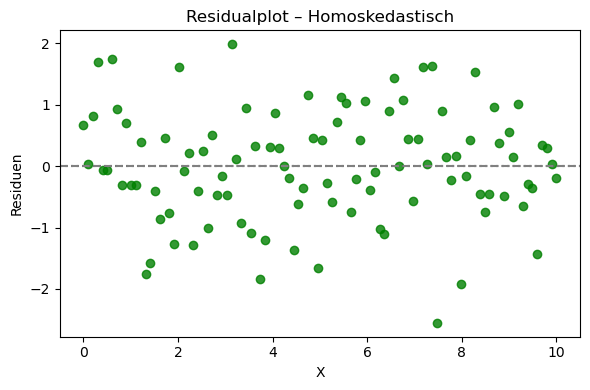

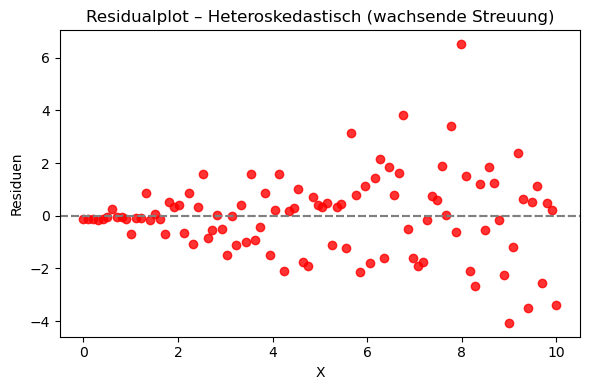

In [24]:
np.random.seed(42)
n = 100
X = np.linspace(0, 10, n)

# 1. Homoskedastisch: konstante Fehlerstreuung
errors_homo = np.random.normal(scale=1, size=n)
Y_homo = 2 + 0.5 * X + errors_homo
df_homo = pd.DataFrame({'X': X, 'Y': Y_homo})
model_homo = smf.ols('Y ~ X', data=df_homo).fit()

# 2. Heteroskedastisch: Fehlerstreuung wächst mit X
errors_hetero = np.random.normal(scale=0.3 * X, size=n)
Y_hetero = 2 + 0.5 * X + errors_hetero
df_hetero = pd.DataFrame({'X': X, 'Y': Y_hetero})
model_hetero = smf.ols('Y ~ X', data=df_hetero).fit()

# Residualplots erstellen und speichern
plt.figure(figsize=(6, 4))
sns.residplot(x='X', y='Y', data=df_homo, lowess=False, color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residualplot – Homoskedastisch')
plt.xlabel('X')
plt.ylabel('Residuen')
plt.tight_layout()
plt.savefig('residual_homoskedastisch.png', dpi=300)
#plt.close()

plt.figure(figsize=(6, 4))
sns.residplot(x='X', y='Y', data=df_hetero, lowess=False, color='red')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residualplot – Heteroskedastisch (wachsende Streuung)')
plt.xlabel('X')
plt.ylabel('Residuen')
plt.tight_layout()
plt.savefig('residual_heteroskedastisch.png', dpi=300)
#plt.close()


C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

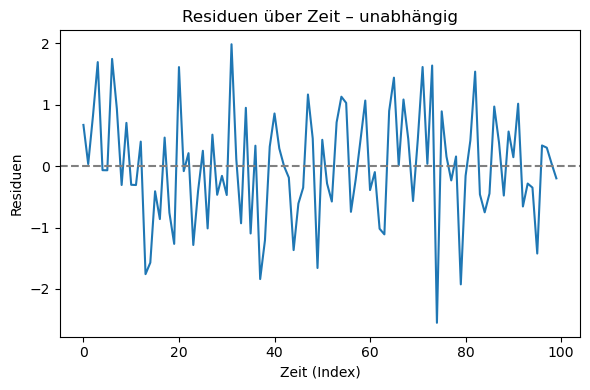

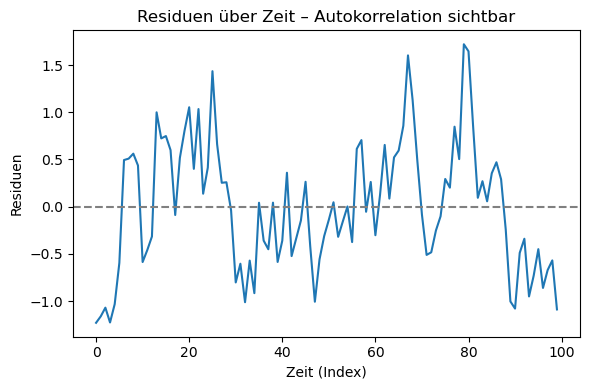

In [25]:
np.random.seed(42)
n = 100
X = np.linspace(0, 10, n)

# 1. Unabhängige Fehler
errors_indep = np.random.normal(scale=1, size=n)
Y_indep = 1 + 0.3 * X + errors_indep
df_indep = pd.DataFrame({'X': X, 'Y': Y_indep, 't': np.arange(n)})
model_indep = smf.ols('Y ~ X', data=df_indep).fit()
df_indep['residuals'] = model_indep.resid

# 2. Autokorrelierte Fehler (AR(1))
errors_auto = np.zeros(n)
errors_auto[0] = np.random.normal()
for t in range(1, n):
    errors_auto[t] = 0.8 * errors_auto[t - 1] + np.random.normal(scale=0.5)

Y_auto = 1 + 0.3 * X + errors_auto
df_auto = pd.DataFrame({'X': X, 'Y': Y_auto, 't': np.arange(n)})
model_auto = smf.ols('Y ~ X', data=df_auto).fit()
df_auto['residuals'] = model_auto.resid

# 3. Residualplot: unabhängige Fehler
plt.figure(figsize=(6, 4))
sns.lineplot(x='t', y='residuals', data=df_indep)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuen über Zeit – unabhängig')
plt.xlabel('Zeit (Index)')
plt.ylabel('Residuen')
plt.tight_layout()
plt.savefig('residuals_unabhaengig.png', dpi=300)
#plt.close()

# 4. Residualplot: autokorrelierte Fehler
plt.figure(figsize=(6, 4))
sns.lineplot(x='t', y='residuals', data=df_auto)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuen über Zeit – Autokorrelation sichtbar')
plt.xlabel('Zeit (Index)')
plt.ylabel('Residuen')
plt.tight_layout()
plt.savefig('residuals_autokorrelation.png', dpi=300)
#plt.close()


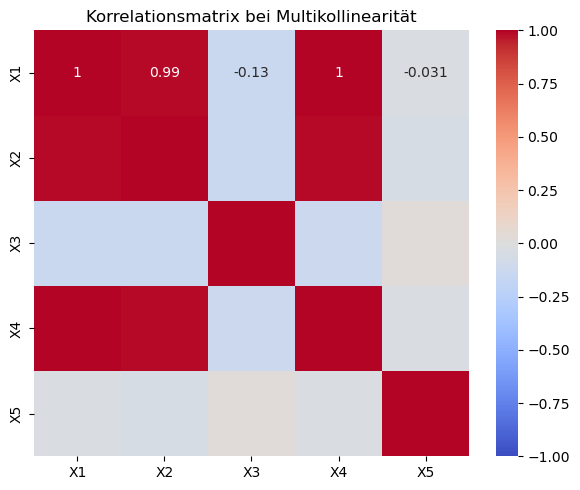

  Variable     VIF
0       X1  134.14
1       X2   62.98
2       X3    1.03
3       X4  232.57
4       X5    1.05


In [26]:
# --- Simulierte Daten mit starker Multikollinearität ---
np.random.seed(42)
n = 200
X1 = np.random.normal(0, 1, n)
X2 = 0.6 * X1 + np.random.normal(0, 0.1, n)  # Hoch korreliert mit X1
X3 = np.random.normal(0, 1, n)
X4 = X1 + X2 + np.random.normal(0, 0.1, n)   # Kombination aus X1 und X2
X5 = np.random.normal(0, 1, n)

df_multi = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "X3": X3,
    "X4": X4,
    "X5": X5
})

# --- 1. Korrelationsmatrix visualisieren ---
plt.figure(figsize=(6, 5))
sns.heatmap(df_multi.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelationsmatrix bei Multikollinearität")
plt.tight_layout()
plt.savefig("korrelation_multikollinearitaet.png")
plt.show()

# --- 2. VIF berechnen ---
X_design = dmatrix("X1 + X2 + X3 + X4 + X5 - 1", df_multi, return_type='dataframe')
vif_df = pd.DataFrame({
    "Variable": X_design.columns,
    "VIF": [variance_inflation_factor(X_design.values, i) for i in range(X_design.shape[1])]
})
print(vif_df.round(2))


C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


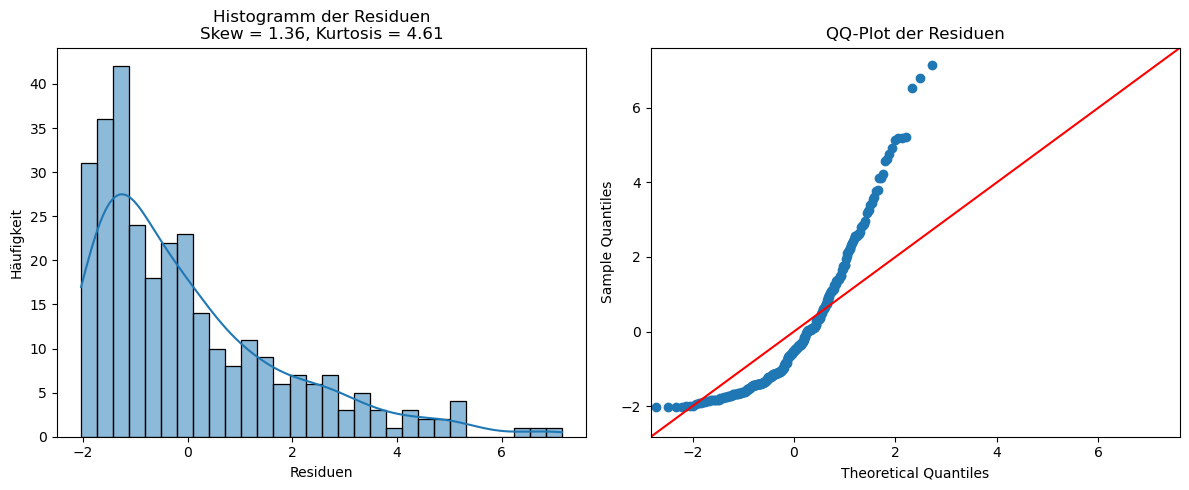

In [27]:
# Reproduzierbarkeit
np.random.seed(42)

# Simulierte lineare Beziehung
n = 300
x = np.linspace(0, 10, n)
y_true = 2 * x + 5

# Fehler ~ Exponentialverteilung (nicht normalverteilt!)
errors = np.random.exponential(scale=2, size=n)
y = y_true + errors

# DataFrame und OLS-Modell
df = pd.DataFrame({'x': x, 'y': y})
model = sm.OLS(df['y'], sm.add_constant(df['x'])).fit()
residuals = model.resid

# Berechnung: Schiefe und Wölbung
skewness = skew(residuals)
kurt = kurtosis(residuals, fisher=False)  # Fisher=False → Vergleichswert für Normalverteilung: 3

# Plot erstellen
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm der Residuen
sns.histplot(residuals, bins=30, kde=True, ax=ax[0])
ax[0].set_title(f'Histogramm der Residuen\nSkew = {skewness:.2f}, Kurtosis = {kurt:.2f}')
ax[0].set_xlabel("Residuen")
ax[0].set_ylabel("Häufigkeit")

# QQ-Plot der Residuen
sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title("QQ-Plot der Residuen")

plt.tight_layout()
plt.savefig("residuen_diagnose_nichtnormal.png", dpi=300)
plt.show()


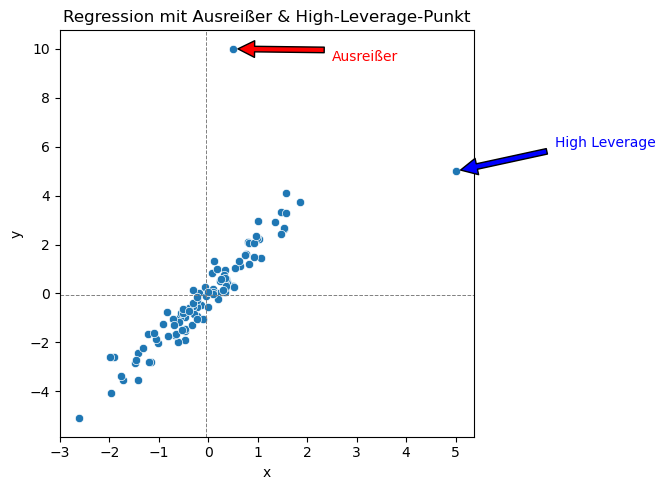

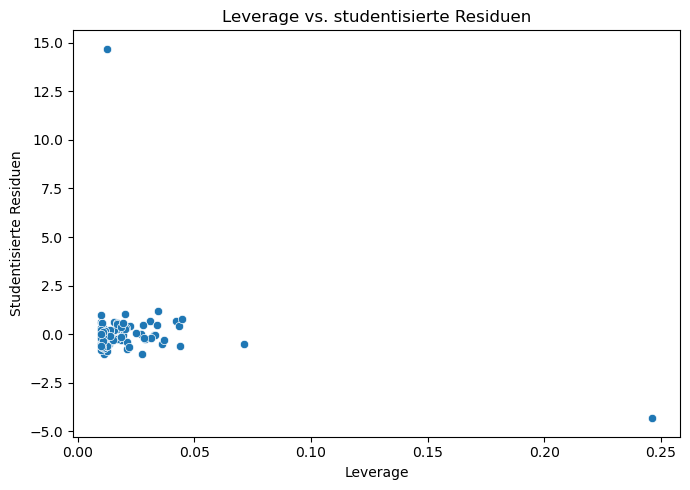

In [32]:
# --- Reproduzierbare Datenbasis mit Ausreißern und High-Leverage ---
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)
y = 2 * x + np.random.normal(0, 0.5, n)

# Zusätzlicher Ausreißer (normales x, ungewöhnliches y)
x_outlier = 0.5
y_outlier = 10

# Zusätzlicher High-Leverage-Punkt (extremes x, plausibles y)
x_leverage = 5
y_leverage = 1 * x_leverage

# Zusammenführen
x = np.append(x, [x_outlier, x_leverage])
y = np.append(y, [y_outlier, y_leverage])

df = pd.DataFrame({'x': x, 'y': y})
df['const'] = 1
X = df[['const', 'x']]

# --- OLS-Modell & Einflussmaße ---
model = sm.OLS(df['y'], X).fit()
influence = model.get_influence()
df['leverage'] = influence.hat_matrix_diag
df['studentized_residuals'] = influence.resid_studentized_external

# --- 1. Plot: Streudiagramm mit Annotationen ---
plt.figure(figsize=(7, 5))
sns.scatterplot(x='x', y='y', data=df)
plt.title("Regression mit Ausreißer & High-Leverage-Punkt")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(df['y'].mean(), color='gray', linestyle='--', linewidth=0.7)
plt.axvline(df['x'].mean(), color='gray', linestyle='--', linewidth=0.7)
plt.annotate("Ausreißer", xy=(x_outlier, y_outlier), xytext=(x_outlier + 2, y_outlier - 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate("High Leverage", xy=(x_leverage, y_leverage), xytext=(x_leverage + 2, y_leverage + 1),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.tight_layout()
plt.savefig("regression_outlier_leverage.png")
plt.show()

# --- 2. Plot: Leverage vs. studentisierte Residuen ---
plt.figure(figsize=(7, 5))
sns.scatterplot(x='leverage', y='studentized_residuals', data=df)
plt.title("Leverage vs. studentisierte Residuen")
plt.xlabel("Leverage")
plt.ylabel("Studentisierte Residuen")
plt.tight_layout()
plt.savefig("leverage_vs_residuals.png")
plt.show()
